ANDROİD GAMES isimli VERİ TABANI üzerinde çalışma yapılmıştır. 
    - Öncelikle veri tablosundaki alanların veri tipleri ve içindeki veri bütünlüğü ele alınmıştır.
    - Tablolar arasındaki ilişkiler ve etkileri ele alınmıştır.
    - Veriler görseleştirilmiş ve yorumlanabilir hale getirilmiştir.
    
    
 Android games offline data on the base were performed. 
 - First, the data types of fields in the data table and the data integrity in them are discussed.
 - Relations and effects between tables are decoded.
 - Data has been visualized and interpreted.

If your plotly module is not in your working environment, please download plotly and run the following codes.
First --> pip install plotly==5.1.0
Then --> import plotly.io as pio and pio.renderers.default = 'iframe'

In [52]:
import numpy as np
import pandas as pd
# Görselleştirme
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# sql
import pyodbc
import pandas.io.sql
from datetime import datetime
now = datetime.now() # current date and time
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium import webdriver

In [53]:
df = pd.read_csv('/Users/sc977/GDriveNew/CLARUSWAY/0_DB/android-games.csv')

In [54]:
df.head(2)

,rank,title,total ratings,installs,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
0,1,Garena Free Fire- World Series,86273129,500.0 M,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
1,2,PUBG MOBILE - Traverse,37276732,500.0 M,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False


In [55]:
df.shape   # 15 farklı kategoride 1730 oyun olduğunu görüyoruz.

(1730, 15)

Verinin incelenmesi çalışnmalarına başlıyoruz. Öncelikle NULL verileri kontrol etmeliyiz. isnull komutuyla veri tabanı içinde NULL kayıt olmadığını görüyoruz. Bu durum verinin incelenmesi açısından oldukça iyi bir durum. Şu haliyle bir sürpriz ile karşılaşmazsak temiz veri olduğu düşünülebilir.

We're starting to study the data. First, we must check the NULL data. with the isnull command, we see that there are no NULL records in the database. This is a pretty good situation in terms of studying the data. As it stands, if we don't face a surprise, it can be considered clean data Juliette.

In [56]:
df.isnull().sum()

rank                0
title               0
total ratings       0
installs            0
average rating      0
growth (30 days)    0
growth (60 days)    0
price               0
category            0
5 star ratings      0
4 star ratings      0
3 star ratings      0
2 star ratings      0
1 star ratings      0
paid                0
dtype: int64

Veri tabanının yapısını incelediğimizde incelenebilecek alanların "RANK", "TİTLE", "TOTAL RATING", "İNSTALLS", "CATEGORY", "PRICE" olduğu ilk bakışta görülmektedir. Anakiz ilerledikçe farı alternatifler düşünülebilir.

RANK - TOTAL RATING İLİŞKİSİ
CATEGORY - RANK İLİŞKİSİ
İNSTALLS - RATİNG İLİŞKİSİ
PİRCE - İNSTALL İLİŞKİSİ

öncelikli olarak analiz edilecek ve yorumlanacak hususlardır.

--------------------

When we examine the structure of the database, it is seen at first glance that the fields that can be examined are "RANK", "TITLE", "TOTAL RATING", "INSTALLS", "CATEGORY", "PRICE". As Anakiz progresses, the shadow can be considered alternatives.

RANK-TOTAL RATING RELATIONSHIP
CATEGORY-RANK RELATIONSHIP
INSTALLS-RATING RELATIONSHIP
PIRCE-INSTALL RELATIONSHIP

first of all, they are issues that will be analyzed and interpreted.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              1730 non-null   int64  
 1   title             1730 non-null   object 
 2   total ratings     1730 non-null   int64  
 3   installs          1730 non-null   object 
 4   average rating    1730 non-null   int64  
 5   growth (30 days)  1730 non-null   float64
 6   growth (60 days)  1730 non-null   float64
 7   price             1730 non-null   float64
 8   category          1730 non-null   object 
 9   5 star ratings    1730 non-null   int64  
 10  4 star ratings    1730 non-null   int64  
 11  3 star ratings    1730 non-null   int64  
 12  2 star ratings    1730 non-null   int64  
 13  1 star ratings    1730 non-null   int64  
 14  paid              1730 non-null   bool   
dtypes: bool(1), float64(3), int64(8), object(3)
memory usage: 191.0+ KB


RANK alanı şu aşamada şu aşamada anlamsız gibi görünüyor, 
TOTAL RATİNG yorumlama açısından önemli alanlardan birisi, 
DESCRİBE ile sayısal veriler incelendiğinde MXİMUM OUTLİER olduğu görülmektedir.
MEAN ve MEDİAN arasındaki veri dikkate alınacak kadar büyük.
Mean değerini yükselten maksimum değer olmalı.Total Rating değeri çok yüksek olan oyunlar var. Dolayısıyla VARAGE RATİNG kesinlikle incelenmeli.

PRİCE verileri hayli ilginç, %99 luk bölümü 0 değerinden oluşuyor. Bu veriden oyunların büyük bölümünün ücretsiz olduğu anlaşılıyor. PRİCE alanını diğer alanlarla ilişkisi daha iyi incelenmeli.

---------------------

The RANK field seems to be meaningless at this stage, one of the important areas in terms of total RATING interpretation is mximum OUTLIER when examining numerical data with DESCRIBE. The data between MEAN and MEDIAN is large enough to be taken into account.Dec. It must be the maximum value that increases the Mean value.There are games with a very high Total Rating. Therefore, VARAGE RATING should definitely be examined.

PRICE data is very interesting, 99% of the part consists of 0. From this data, it seems that most of the games are free. Price's relationship to other fields should be better studied.

In [58]:
df.describe() 

,rank,total ratings,average rating,growth (30 days),growth (60 days),price,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings
count,1730.000000,1.730000e+03,1730.000000,1730.000000,1730.000000,1730.000000,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03,1.730000e+03
mean,50.386705,1.064332e+06,3.908092,321.735896,122.554971,0.010942,7.622315e+05,1.164366e+05,5.706307e+04,2.710336e+04,1.014950e+05
std,28.936742,3.429250e+06,0.290973,6018.914507,2253.891703,0.214987,2.538658e+06,3.021631e+05,1.495314e+05,8.154542e+04,4.083745e+05
min,1.000000,3.299300e+04,2.000000,0.000000,0.000000,0.000000,1.397500e+04,2.451000e+03,7.180000e+02,2.660000e+02,5.450000e+02
25%,25.000000,1.759992e+05,4.000000,0.100000,0.200000,0.000000,1.277300e+05,2.064300e+04,9.652500e+03,4.262250e+03,1.281200e+04
50%,50.000000,4.286065e+05,4.000000,0.500000,1.000000,0.000000,2.964340e+05,5.098050e+04,2.507800e+04,1.067550e+04,3.368600e+04
75%,75.000000,8.837970e+05,4.000000,1.700000,3.300000,0.000000,6.198358e+05,1.018140e+05,5.229500e+04,2.322875e+04,8.015725e+04
max,100.000000,8.627313e+07,4.000000,227105.700000,69441.400000,7.490000,6.354677e+07,5.404966e+06,3.158756e+06,2.122183e+06,1.249592e+07


INSTALLS alanını incelediğimizde oyunların install bilgileri görülmektedir. Ancak verialanı OBJECT tipindedir. İçeriğinde ise rakamlarla beraber harflerde bulunmaktadır. Budurm Analizi etkileyeceğinde bu alan üzerinde aynılaştırma çalışması yapılması gerekmektedir. Bu alandaki veriler sayısal değere çevrilip anlamlı hale getirilmelidir.

Aynılaştırma çalışması yapıldıktan sonra CATEGORY alanıyla ilişkisi üzerinde durulmalıdır.

--------------


When we examine the INSTALLS field, we see the install information of the games. However, the data is of the OBJECT type. In its content, it is in letters with numbers. If this will affect the analysis, it is necessary to do the same work on this area. Data in this field should be translated to numeric value and made meaningful.

After doing the same study, the relationship with the CATEGORY field should be emphasized.

Veri içeriğinde BİN aralığını ifade eden K harfi, MİLYON aralığını ifade eden M harfinin olduğu görülmektedir. Öncelikle K harfinin değerleri M harfine dönüştürülmeli, Sonrasındada M harfi düşürüldüğünde sayısal veriler analiz edilebilir duruma gelecektir. 

-------------------

In December, the data is shown to contain the letter K, which refers to the December thousand, and the letter M, which refers to the range of million. First, the values of the letter K must be converted to the letter M, and then, when the letter M is reduced, the numerical data will be analyzed.

In [59]:
df["installs"].value_counts()

10.0 M      805
50.0 M      252
5.0 M       245
100.0 M     204
1.0 M       192
500.0 k      15
500.0 M      12
100.0 k       3
1000.0 M      2
Name: installs, dtype: int64

In [60]:
def in_thousand (inst):
    if inst == '500.0 k':
        return '0.5 M' 
    elif inst == '100.0 k':
        return '0.1 M'
    else:
        return inst
df['installs']= df['installs'].apply(in_thousand)

df['installs']= df['installs'].str.replace( 'M', '').str.strip().astype('float')

df= df.rename(columns={'installs': 'installs_in_million'})
df['installs_in_million'].value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

PRİCE ve PAİD alanları üzerinde çalışalım. Bu alanlar incelendiğinde öncelikle veri tiplerinin farklı olduğu görülecektir. 
alanı incelendiğinde ürünlerin fiyatlarından sadece 7 tanesinde fiyat bilgisinin olduğu, diğerlerinin ücretsiz olması PRİCE ve PAİD alanındaki incelemeyi anlamsız hale getirmketedir. SAMPLE inceleme için kabul edilen minimum degeri 30 ile 50 arasında değiştiği düşünüldüğünde mevcut verinin yorumlama için yeterli olmayacağı aşikardır. Ancak diğer alanlarla ilişkidi değerlendirilebilir.  

-----------------------
Let's work on the price and PAID fields. When these fields are examined, it will be seen that the data types are different first. 
when examining the field, only 7 of the prices of products have Price Information, others are free of charge, making the review in the PRICE and PAID field meaningless. Given that the minimum accepted value for SAMPLE review varies between 30 and 50, it is obvious that the available data will not be sufficient for interpretation.Dec. But its relationship to other areas can be evaluated.

In [61]:
df["price"].value_counts()

0.00    1723
1.99       3
1.49       1
0.99       1
2.99       1
7.49       1
Name: price, dtype: int64

In [62]:
df["price"].value_counts(normalize=True)

0.00    0.995954
1.99    0.001734
1.49    0.000578
0.99    0.000578
2.99    0.000578
7.49    0.000578
Name: price, dtype: float64

In [63]:
df["paid"].value_counts()

False    1723
True        7
Name: paid, dtype: int64

PRICE alanı ve PAID alanı aynı olduğundan analiz için PAID alanı ile devam edileceğinden PRICE alanı DROP ile veri tabanından kaldırılmıştır.

---------

Since the price field and the PAID field are the same, the price Field has been removed from the database with DROP, as the analysis will continue with the PAID field.

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 1730 non-null   int64  
 1   title                1730 non-null   object 
 2   total ratings        1730 non-null   int64  
 3   installs_in_million  1730 non-null   float64
 4   average rating       1730 non-null   int64  
 5   growth (30 days)     1730 non-null   float64
 6   growth (60 days)     1730 non-null   float64
 7   price                1730 non-null   float64
 8   category             1730 non-null   object 
 9   5 star ratings       1730 non-null   int64  
 10  4 star ratings       1730 non-null   int64  
 11  3 star ratings       1730 non-null   int64  
 12  2 star ratings       1730 non-null   int64  
 13  1 star ratings       1730 non-null   int64  
 14  paid                 1730 non-null   bool   
dtypes: bool(1), float64(4), int64(8), obje

ANALİZ BÖLÜMÜNE BAŞLAYALIM

CATEGORY alanı analiz ve yorumlamanın en önemli alanlarından birisi olacaktır. CATEGORY alanını merkeze koyup öncelikle diğer alanlarla ilişkisi yorumlanacaktır. Veri tabanında yaklaşık 100 oyun kategorisinin verileri bulunmaktadır. 

-------------------
The CATEGORY field will be one of the most important areas of analysis and interpretation. The CATEGORY field will be placed in the center and its relationship with other fields will be interpreted first. The database contains data from about 100 game categories.

In [65]:
df["category"].value_counts()

GAME CARD            126
GAME WORD            104
GAME SPORTS          100
GAME ROLE PLAYING    100
GAME SIMULATION      100
GAME CASINO          100
GAME MUSIC           100
GAME CASUAL          100
GAME STRATEGY        100
GAME TRIVIA          100
GAME EDUCATIONAL     100
GAME ADVENTURE       100
GAME PUZZLE          100
GAME ARCADE          100
GAME ACTION          100
GAME BOARD           100
GAME RACING          100
Name: category, dtype: int64

Görselleştirme araçlarıyla çalışmaya başlayalım.

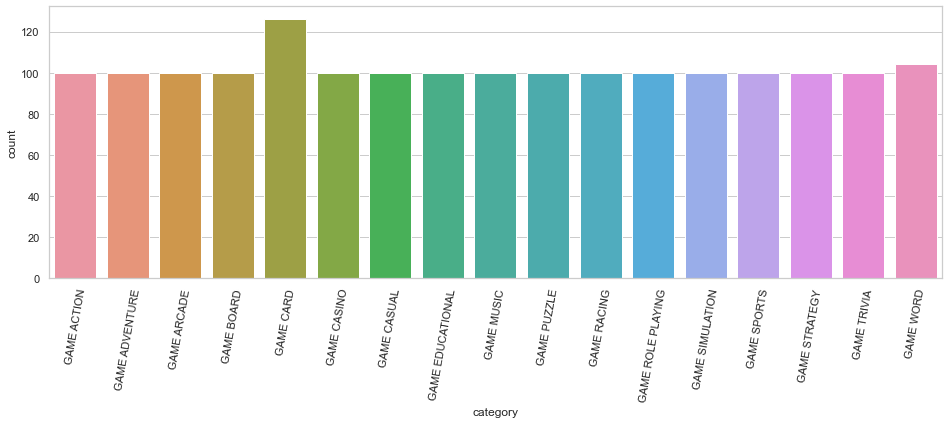

In [66]:
plt.figure(figsize=(16,5)) 
sns.countplot(x = "category", data = df)
plt.xticks(rotation = 80);

In [67]:
fig = px.histogram(df, x="category", title='Game Categories')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [68]:
## total ratigs 

In [69]:
df["total ratings"].describe()

count    1.730000e+03
mean     1.064332e+06
std      3.429250e+06
min      3.299300e+04
25%      1.759992e+05
50%      4.286065e+05
75%      8.837970e+05
max      8.627313e+07
Name: total ratings, dtype: float64

<Figure size 8000x6400 with 0 Axes>

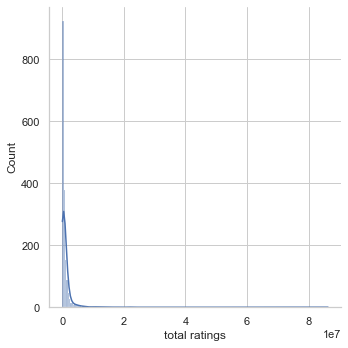

In [70]:
# HİSTOGRAMDA GÖSTERECEĞİZ

plt.figure(figsize=(20,16), dpi =400)
sns.displot(x='total ratings', data= df, bins=200, kde= True)

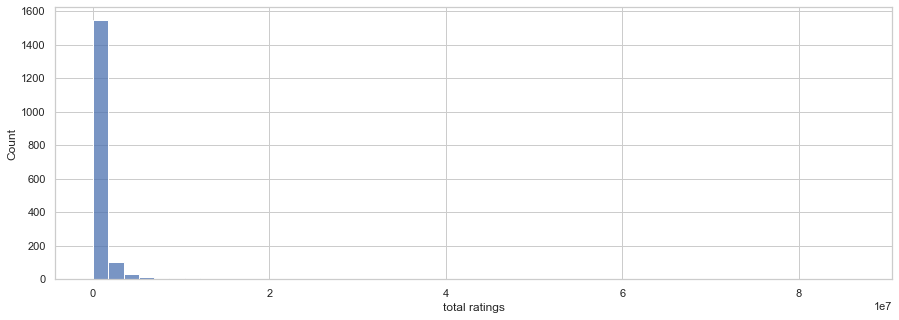

In [71]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x ="total ratings", bins = 50);

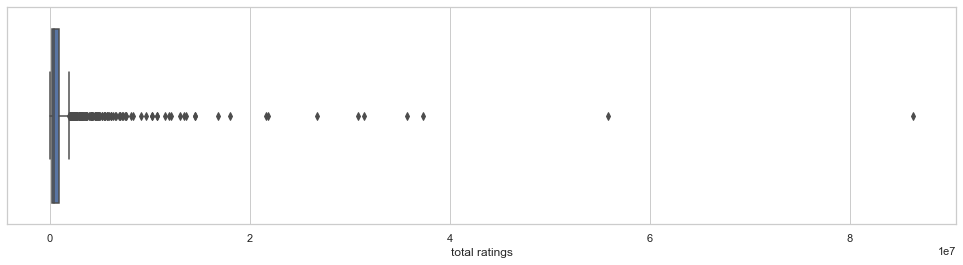

In [72]:
plt.figure(figsize=(17,4))
sns.boxplot(data=df, x ="total ratings");

In [73]:
fig = px.histogram(df, x= 'total ratings', title='Total Ratings of the Games')
fig.show()

In [74]:
fig = px.box(df, x= 'total ratings', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

In [75]:
## instal ile ilgili açıklayıcı grafik

İNSTALATİON ile ilgili görselleştirmeleri inceleyelim.

In [77]:
df['installs_in_million'].describe()

count    1730.000000
mean       29.176185
std        60.287333
min         0.100000
25%         5.000000
50%        10.000000
75%        50.000000
max      1000.000000
Name: installs_in_million, dtype: float64

In [78]:
df.installs_in_million.value_counts()

10.0      805
50.0      252
5.0       245
100.0     204
1.0       192
0.5        15
500.0      12
0.1         3
1000.0      2
Name: installs_in_million, dtype: int64

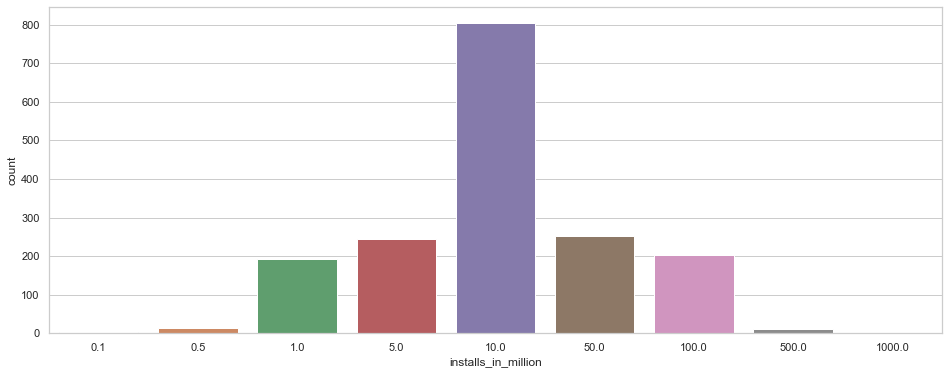

In [87]:
plt.figure(figsize = (16,6))
sns.countplot( x = df['installs_in_million']);

In [82]:
fig = px.box(df, x= 'installs_in_million', hover_data = df[['title','installs_in_million']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

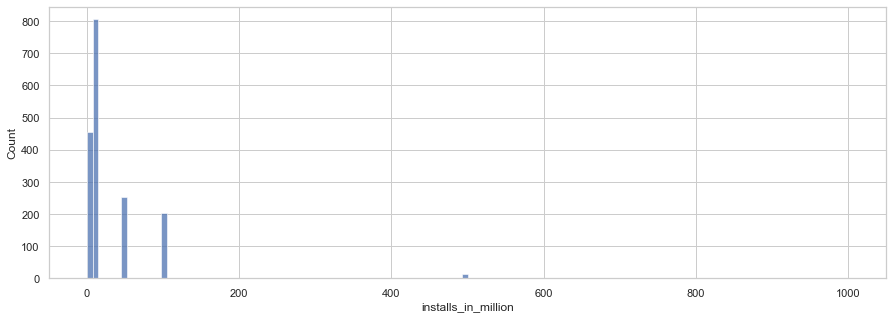

In [91]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x ="installs_in_million");

In [92]:
fig = px.box(df, x= 'installs_in_million', hover_data = df[['title','category']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

Paid an Games

In [97]:
df['paid'].describe()

count      1730
unique        2
top       False
freq       1723
Name: paid, dtype: object

In [98]:
df['paid'].value_counts()

False    1723
True        7
Name: paid, dtype: int64

In [99]:
df['paid'].value_counts(normalize=True)

False    0.995954
True     0.004046
Name: paid, dtype: float64

In [104]:
values = [7, 1723]
index = ["Paid", "Free"]

In [105]:
index, values

(['Paid', 'Free'], [7, 1723])

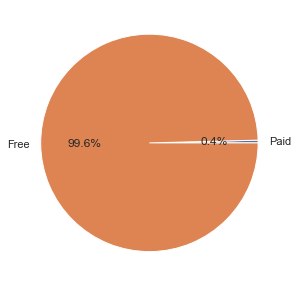

In [106]:
plt.figure(figsize=(7,5))
y = values
mylabels = index
myexplode = [0, 0]
plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')
plt.show()

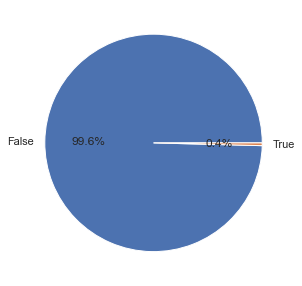

In [107]:
plt.figure(figsize=(7,5))
y = df["paid"].value_counts().values
mylabels = df["paid"].value_counts().index
myexplode = [0, 0]
plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')
plt.show()

In [108]:
paid_free= df['paid'].value_counts()
label =['Free','Paid']
fig = px.pie(paid_free, values=df['paid'].value_counts().values, names=label,
             title='Paid & Free Games')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [ ]:
df["paid"].value_counts()

In [ ]:
plt.figure(figsize=(7,5))
y = df["paid"].value_counts().values
mylabels = df["paid"].value_counts().index
myexplode = [0, 0]

plt.pie(y, labels = mylabels, labeldistance=1.1, explode = myexplode, startangle=0, autopct='%1.1f%%')

plt.show()


In [ ]:
# creating pieplot using with plotly library
paid_free= df['paid'].value_counts()
label =['Free','Paid']
fig = px.pie(paid_free, values=df['paid'].value_counts().values, names=label,
             title='Paid & Free Games')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

## total ratings by category

category lere göre toplam ratingslerin 10 kategorinin her birinin toplam ratini var. 
kategorilerle toplam tarting gözküsün. group by la bunu çözebilirim.

In [109]:
a=df.groupby ('category')['total ratings'].mean()
a

category
GAME ACTION          4.011344e+06
GAME ADVENTURE       8.935617e+05
GAME ARCADE          1.793780e+06
GAME BOARD           4.457431e+05
GAME CARD            3.326041e+05
GAME CASINO          3.619031e+05
GAME CASUAL          2.470866e+06
GAME EDUCATIONAL     1.529804e+05
GAME MUSIC           2.163020e+05
GAME PUZZLE          9.466929e+05
GAME RACING          1.139027e+06
GAME ROLE PLAYING    7.087648e+05
GAME SIMULATION      9.341417e+05
GAME SPORTS          1.353829e+06
GAME STRATEGY        1.856570e+06
GAME TRIVIA          2.982217e+05
GAME WORD            3.943603e+05
Name: total ratings, dtype: float64

In [110]:
type(a)

pandas.core.series.Series

In [111]:
a.index

Index(['GAME ACTION', 'GAME ADVENTURE', 'GAME ARCADE', 'GAME BOARD',
       'GAME CARD', 'GAME CASINO', 'GAME CASUAL', 'GAME EDUCATIONAL',
       'GAME MUSIC', 'GAME PUZZLE', 'GAME RACING', 'GAME ROLE PLAYING',
       'GAME SIMULATION', 'GAME SPORTS', 'GAME STRATEGY', 'GAME TRIVIA',
       'GAME WORD'],
      dtype='object', name='category')

In [112]:
a.values

array([4011343.6       ,  893561.74      , 1793779.91      ,
        445743.07      ,  332604.0952381 ,  361903.09      ,
       2470866.04      ,  152980.35      ,  216302.02      ,
        946692.92      , 1139026.8       ,  708764.83      ,
        934141.65      , 1353828.82      , 1856569.75      ,
        298221.72      ,  394360.32692308])

Kategorilere göre raytingleri inceleyelim. Oyun kategorilerine göre yükleme bilgileri incelenmiştir. Oyunların kategorilerine göre yüklenme bilgileri oyun şirketleri için yön çimek için faydalı olabilir. Yatırımlar ve tercihlerin belirlenmesine önemli olabilir. Veri setinde yaş sınırlandırması olsaydı çok daha net bir sınıflandırma ve analiz imkanı olabilirdi. Rakamlardan da anlaşılacağı üzere ACTİON oyunları en çok indirilen oyunlaların başında geliyor. Yatırım planı varsa bu alana yapılabilir. Eğitim alanındaki oyunlarda indirme oldukça düşük, Eğitim alanındaki oyunlarda gelir hedefi orta seviyede tutulmalıdır.

-------------------------
So I take was broadcast according to categories. Download information by game categories is examined. Loading information by categories of games can be useful for direction grass for game companies. It can be important to determine investments and preferences. If there were age restrictions in the data set, there would be a much clearer classification and analysis. As can be seen from the figures, action games are the most downloaded games. If you have an investment plan, it can be done in this area. In games in the training area, the download is quite low, and in games in the training area, the revenue target should be kept at a moderate level.

In [113]:
b=df.groupby ('category')['installs_in_million'].mean().sort_values(ascending=False)
b

category
GAME ACTION          74.100000
GAME ARCADE          71.610000
GAME CASUAL          63.970000
GAME RACING          46.750000
GAME PUZZLE          36.210000
GAME SPORTS          33.610000
GAME SIMULATION      27.710000
GAME STRATEGY        23.910000
GAME BOARD           21.230000
GAME ADVENTURE       18.030000
GAME EDUCATIONAL     17.895000
GAME ROLE PLAYING    14.080000
GAME MUSIC           12.487000
GAME CARD            12.484127
GAME WORD            12.317308
GAME CASINO           7.715000
GAME TRIVIA           6.901000
Name: installs_in_million, dtype: float64

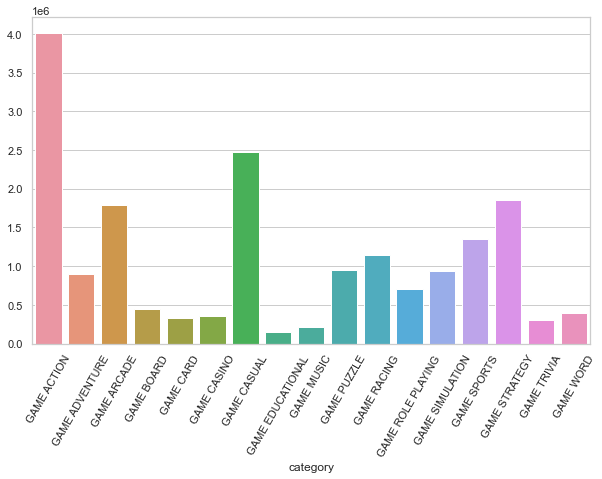

In [117]:
plt.figure(figsize=(10,6))
sns.barplot(data = df, x = a.index, y = a.values)
plt.xticks(rotation = 60);
plt.show()

In [118]:
fig = px.bar(a, x= a.index, y=a.values, labels={'y':'Total Ratings'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Kategoriye Göre En İyi Sıralanmış 5 Oyun

In [123]:
BestFive = df[df['rank']<6][['rank','title','category', 'total ratings', 'installs_in_million', '5 star ratings']]
BestFive

,rank,title,category,total ratings,installs_in_million,5 star ratings
0,1,Garena Free Fire- World Series,GAME ACTION,86273129,500.0,63546766
1,2,PUBG MOBILE - Traverse,GAME ACTION,37276732,500.0,28339753
2,3,Mobile Legends: Bang Bang,GAME ACTION,26663595,100.0,18777988
3,4,Brawl Stars,GAME ACTION,17971552,100.0,13018610
4,5,Sniper 3D: Fun Free Online FPS Shooting Game,GAME ACTION,14464235,500.0,9827328
...,...,...,...,...,...,...
1626,1,كلمات كراش - لعبة تسلية وتحدي من زيتونة,GAME WORD,2418119,10.0,2115189
1627,2,Word Cookies!®,GAME WORD,2250585,10.0,1679256
1628,3,Words of Wonders: Crossword to Connect Vocabulary,GAME WORD,1885400,100.0,1457939
1629,4,Words with Friends Classic: Word Puzzle Challenge,GAME WORD,1722914,50.0,971880


In [124]:
fig = px.scatter(BestFive, y= 'title', x='total ratings', 
                 hover_data = BestFive[['category','rank']], color='category', 
                 title = "Top 5 Games by Their Total Ratings")
fig.show()

In [127]:
fig = px.scatter(BestFive, y= 'title', x='installs_in_million', 
                 hover_data = BestFive[['category','rank']], color='category', 
                 title = "Top 5 Games by Their Installations in Millions")
fig.show()

In [129]:
fig = px.scatter(BestFive, y= 'title', x='5 star ratings', 
                 hover_data = BestFive[['category','rank']], color='category', 
                 title = "Top 5 Games by 5 Star Rankings")
fig.show()

In [136]:
best50 = df.sort_values(by='installs_in_million', ascending=False).head(50)  

In [137]:
best50

,rank,title,total ratings,installs_in_million,average rating,growth (30 days),growth (60 days),price,category,5 star ratings,4 star ratings,3 star ratings,2 star ratings,1 star ratings,paid
200,1,Subway Surfers,35665901,1000.0,4,0.5,1.0,0.0,GAME ARCADE,27138572,3366600,1622695,814890,2723142,False
626,1,Candy Crush Saga,31367945,1000.0,4,0.9,1.6,0.0,GAME CASUAL,23837448,4176798,1534041,486005,1333650,False
0,1,Garena Free Fire- World Series,86273129,500.0,4,2.1,6.9,0.0,GAME ACTION,63546766,4949507,3158756,2122183,12495915,False
207,8,Temple Run,4816448,500.0,4,0.7,1.5,0.0,GAME ARCADE,3184391,438320,318164,204384,671187,False
1426,1,Clash of Clans,55766763,500.0,4,0.3,1.0,0.0,GAME STRATEGY,43346128,5404966,2276203,971321,3768141,False
1026,1,Hill Climb Racing,10188038,500.0,4,0.4,0.8,0.0,GAME RACING,7148370,982941,607603,338715,1110407,False
1326,1,8 Ball Pool,21632735,500.0,4,1.2,630.8,0.0,GAME SPORTS,16281475,2268294,1017204,425693,1640067,False
630,5,Pou,11506051,500.0,4,0.2,0.5,0.0,GAME CASUAL,8175679,1051014,688712,346244,1244400,False
628,3,My Talking Angela,13050503,500.0,4,0.6,1.4,0.0,GAME CASUAL,9165205,1073761,636763,399662,1775110,False
1,2,PUBG MOBILE - Traverse,37276732,500.0,4,1.8,3.6,0.0,GAME ACTION,28339753,2164478,1253185,809821,4709492,False


In [138]:
fig = px.bar(best50, x= 'title', y='installs_in_million', hover_data = best50[['5 star ratings']], color='category')
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

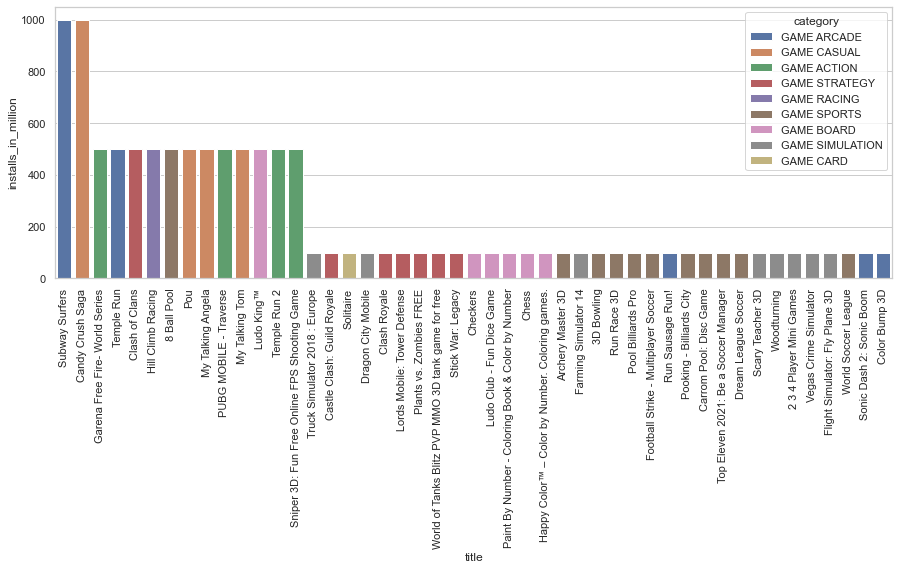

In [140]:
plt.figure(figsize=(15,5))
sns.barplot(data = best50, x = "title", y = "installs_in_million", hue = "category", dodge = False)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
Teşekkür ederim.
Emeği geçen herkese özellikle KAAN beye teşekkür ederim. Başlangıç seviyesindeki bu projeyi incelerken keyif almanız umuyorum.

-----------
Thank you.
I would like to thank everyone who contributed, especially Mr. KAAN. I hope you enjoy this entry-level project.